In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import os
import re
import copy
import json

In [2]:

from chessboard_utils import *




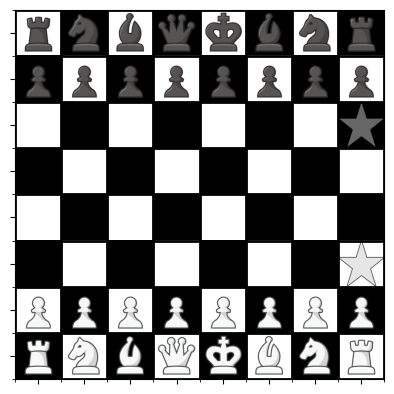

In [3]:
game_state = np.array([
    [-2, -3, -4, -6, -5, -4, -3, -2],
    [-1, -1, -1, -1, -1, -1, -1, -1],
    [ 0,  0,  0,  0,  0,  0,  0,  -7],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  0],
    [ 0,  0,  0,  0,  0,  0,  0,  7],
    [ 1,  1,  1,  1,  1,  1,  1,  1],
    [ 2,  3,  4,  6,  5,  4,  3,  2],
])

    
draw_chessboard(game_state, show=True)


In [4]:
from movement_analysis import *

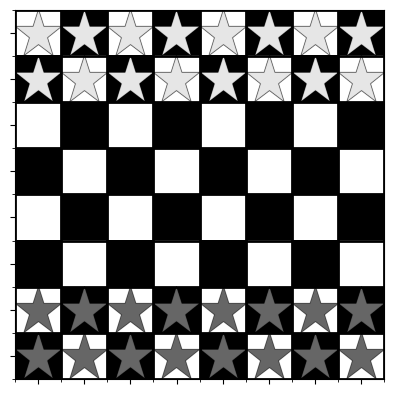


##############################################

Game state 0 (Frame: warped_frame_000100.png):
MOVEMENT ANALYSIS
changes (array([], dtype=int64), array([], dtype=int64))
positions []
Invalid move: No changes detected

##############################################

Game state 1 (Frame: warped_frame_000150.png):
MOVEMENT ANALYSIS
changes (array([], dtype=int64), array([], dtype=int64))
positions []
Invalid move: No changes detected

##############################################

Game state 2 (Frame: warped_frame_000400.png):
MOVEMENT ANALYSIS
changes (array([1, 3], dtype=int64), array([4, 4], dtype=int64))
positions [(1, 4), (3, 4)]
moving_piece 7
initial_final_value 0
move e7 -> e5
VERIFY MOVEMENT
pawn_movements [(2, 4), (3, 4)]
final_pos (3, 4)
pawn move verified
rook_movements [(2, 4), (3, 4), (4, 4), (5, 4), (6, 4)]
rook move verified
Move: e7 -> e5


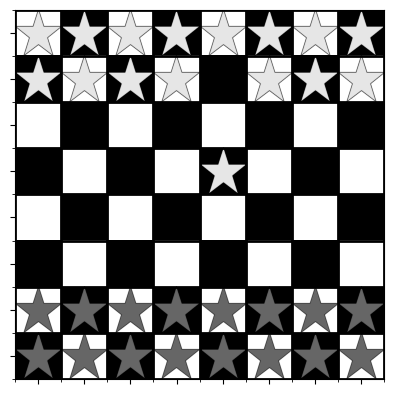

[[ 7  7  7  7  7  7  7  7]
 [ 7  7  7  7  0  7  7  7]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [-7 -7 -7 -7 -7 -7 -7 -7]
 [-7 -7 -7 -7 -7 -7 -7 -7]]

##############################################

Game state 3 (Frame: warped_frame_000450.png):
MOVEMENT ANALYSIS
changes (array([6], dtype=int64), array([0], dtype=int64))
positions [(6, 0)]
Invalid move: Unrecognized move pattern

##############################################

Game state 4 (Frame: warped_frame_000500.png):
MOVEMENT ANALYSIS
changes (array([6], dtype=int64), array([0], dtype=int64))
positions [(6, 0)]
Invalid move: Unrecognized move pattern

##############################################

Game state 5 (Frame: warped_frame_000550.png):
MOVEMENT ANALYSIS
changes (array([], dtype=int64), array([], dtype=int64))
positions []
Invalid move: No changes detected

##############################################

Game state 6 (Frame: warped_frame_000600.png):
MOVEM

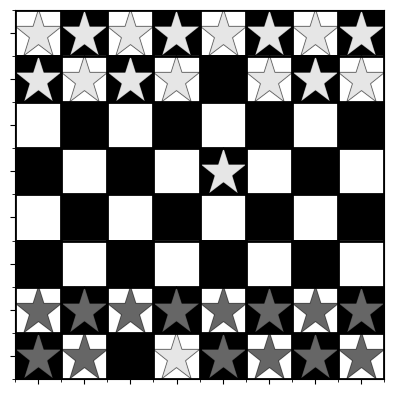

[[ 7  7  7  7  7  7  7  7]
 [ 7  7  7  7  0  7  7  7]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [-7 -7 -7 -7 -7 -7 -7 -7]
 [-7 -7  0  7 -7 -7 -7 -7]]

##############################################

Game state 8 (Frame: warped_frame_000800.png):
MOVEMENT ANALYSIS
changes (array([1, 5, 7, 7, 7], dtype=int64), array([0, 2, 1, 2, 3], dtype=int64))
positions [(1, 0), (5, 2), (7, 1), (7, 2), (7, 3)]
Invalid move: Invalid number of position changes

##############################################

Game state 9 (Frame: warped_frame_000850.png):
MOVEMENT ANALYSIS
changes (array([5, 7, 7, 7], dtype=int64), array([2, 1, 2, 3], dtype=int64))
positions [(5, 2), (7, 1), (7, 2), (7, 3)]
Invalid move: Invalid number of position changes

##############################################

Game state 10 (Frame: warped_frame_001100.png):
MOVEMENT ANALYSIS
changes (array([1, 3, 5, 6, 7, 7, 7], dtype=int64), array([5, 5, 2, 0, 1, 2, 3], dtype=i

In [5]:


# Read the game states from game_state.json
with open('game_state.json', 'r') as f:
    game_data = json.load(f)


last_game_state = game_data['game_states'][0]['gs']

draw_chessboard(last_game_state, show=True)


# Display each game state
for i, state in enumerate(game_data['game_states'][1:]):

    print('\n##############################################')
    print(f"\nGame state {i} (Frame: {state['frame']}):")

    

    valid_move = True

    
    curr_state = np.array(state['gs'])
    move_analysis = analyze_move(last_game_state, curr_state)

    valid_move = move_analysis['valid']
    
    if move_analysis['valid']:
        from_pos = move_analysis['from_pos']
        to_pos = move_analysis['to_pos']
        piece = move_analysis['piece']
        
        # Convertir les positions en notation d'échecs
        from_square = f"{chr(97 + from_pos[1])}{8 - from_pos[0]}"
        to_square = f"{chr(97 + to_pos[1])}{8 - to_pos[0]}"
        
        if move_analysis['move_type'] == 'move':
            print(f"Move: {from_square} -> {to_square}")
        else:  # capture
            print(f"Capture: {from_square} x {to_square}")

        draw_chessboard(curr_state, show=True)
        print(curr_state)

        last_game_state = curr_state
    else:
        print(f"Invalid move: {move_analysis['message']}")

    
    


    
    
    
    
